In [ ]:
!pip install quandl
!pip install pycoingecko
import quandl
from pycoingecko import CoinGeckoAPI
import pandas as pd
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount("/drive", force_remount=True)

In [ ]:
# Set time and API variable

quandl.ApiConfig.api_key ="<Your-API-Key"
cg = CoinGeckoAPI()

now = date.today() - timedelta(days=1)
ttm = date.today() - timedelta(days=365)
now.strftime('%Y-%m-%d')
ttm.strftime('%Y-%m-%d')

now_date_string = now.strftime('%Y-%m-%d')
now_date = datetime.strptime(now_date_string, '%Y-%m-%d')
now_timestamp = str(int(datetime.timestamp(now_date)))

TTM_date_string = ttm.strftime('%Y-%m-%d')
TTM_date = datetime.strptime(TTM_date_string, '%Y-%m-%d')
TTM_timestamp = str(int(datetime.timestamp(TTM_date)))

#print(now_timestamp)
#print(TTM_timestamp)

In [ ]:
# Get Datasets
btc_usd = cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp=TTM_timestamp,to_timestamp=now_timestamp)
btc_usd = pd.DataFrame.from_records(btc_usd)
btc_usd = pd.DataFrame.from_records(btc_usd['prices'])
btc_usd.columns =['Timestamp','Prices']
btc_usd['Timestamp'] = pd.to_datetime(btc_usd['Timestamp'], unit = 'ms')
#print(btc_usd)

btc_hashrate = quandl.get("BCHAIN/HRATE", authtoken="8T_MwCyyd93FZLysnMrX", start_date=ttm, end_date=now)
btc_hashrate['Date'] = btc_hashrate.index
#print(btc_hashrate)

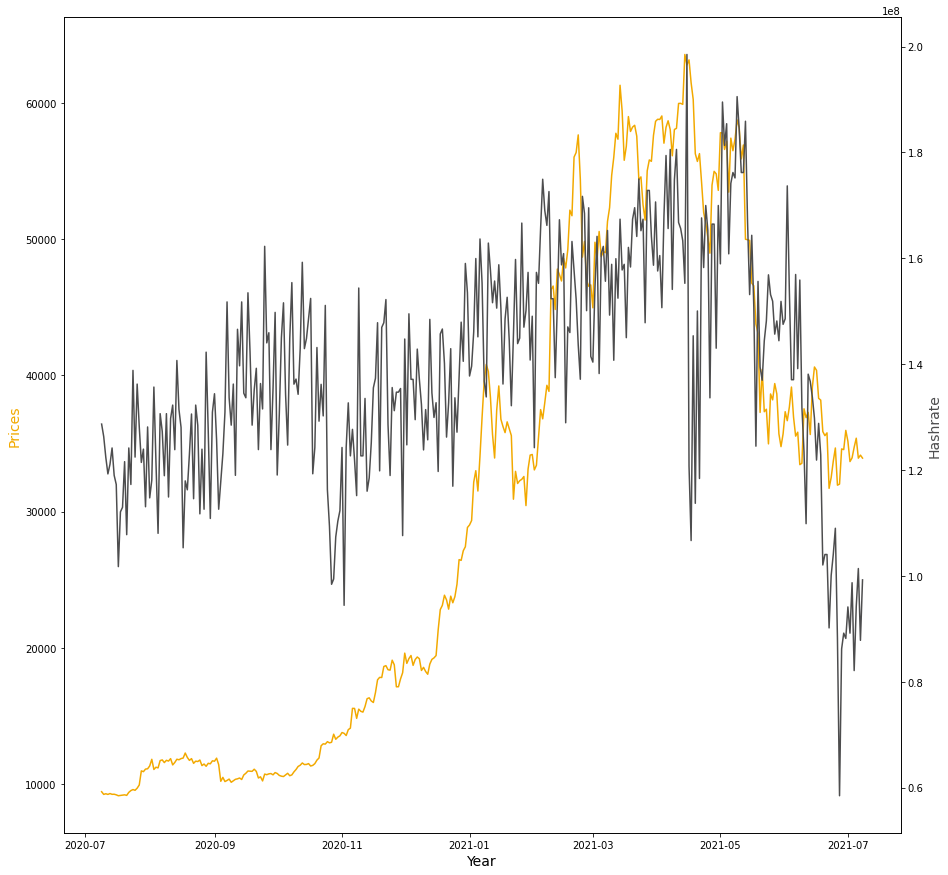

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,15))
# make a plot
ax.plot(btc_usd.Timestamp, btc_usd.Prices,color="#f2a900")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Prices",color="#f2a900",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(btc_hashrate.Date, btc_hashrate.Value,color="#4d4d4e")
ax2.set_ylabel("Hashrate",color="#4d4d4e",fontsize=14)
plt.show()

In [ ]:
# Create data for the correlation coefficient
data = btc_usd.merge(btc_hashrate, left_on="Timestamp", right_index=True)
data.set_index('Timestamp',inplace=True)
data = data[['Prices', 'Value']]
print(data)
returns_daily = data.pct_change()
print(returns_daily)
btc_change = returns_daily['Prices']
hash_change = returns_daily['Value']

Text(0.5, 1.0, '30 Day Bitcoin-Hashrate Correlation')

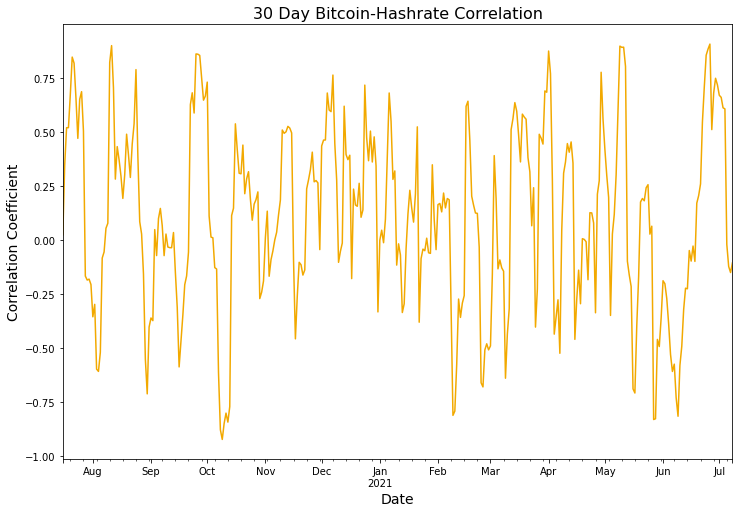

In [ ]:
# Plot Chart
period = 7
price_hash_corrs = btc_change.rolling(period).corr(other=hash_change).dropna()
price_hash_corrs.plot(figsize=(12,8), label='BTC-HASH', color='#f2a900')

#add axes labels and a title
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('7 Day Bitcoin-Hashrate Correlation', fontsize=16)